<a href="https://colab.research.google.com/github/hasanocal7/Kur_3/blob/main/Ensemble_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_excel("Concrete_Data.xls")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [7]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
target_col = "Concrete compressive strength(MPa, megapascals) "

<Axes: xlabel='Concrete compressive strength(MPa, megapascals) ', ylabel='Density'>

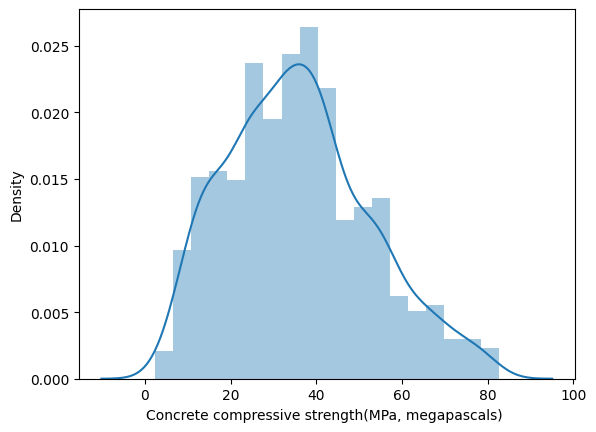

In [9]:
sns.distplot(df[target_col])

# IQR

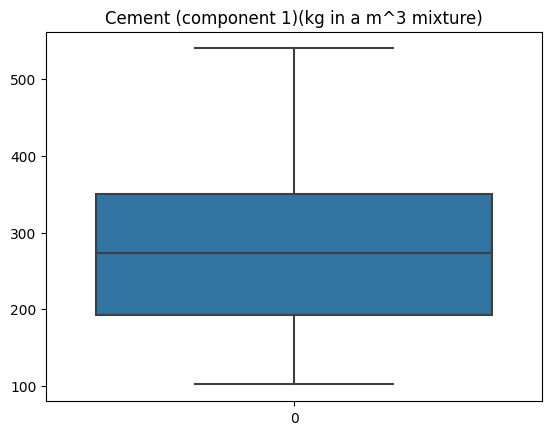

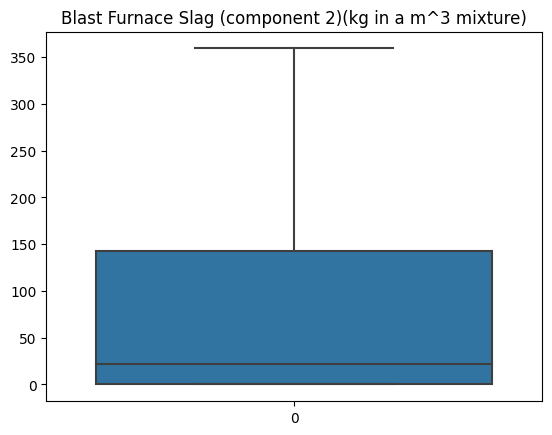

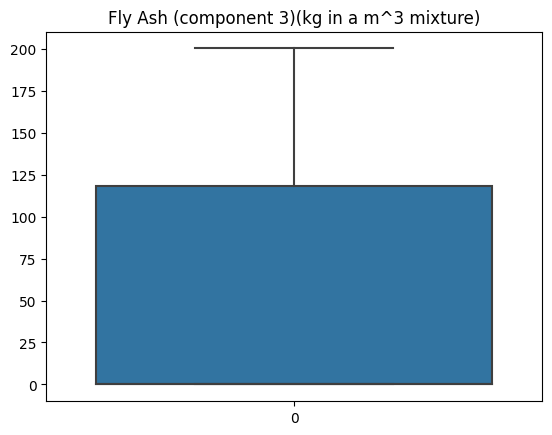

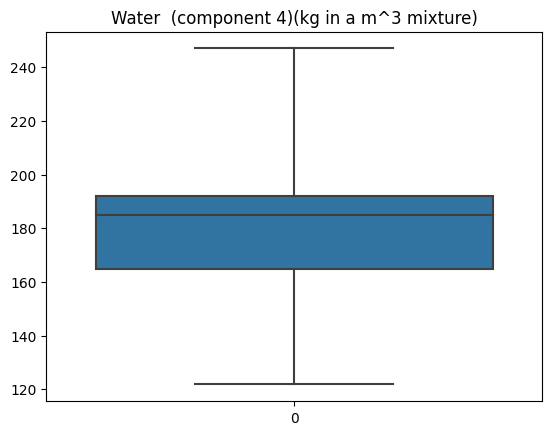

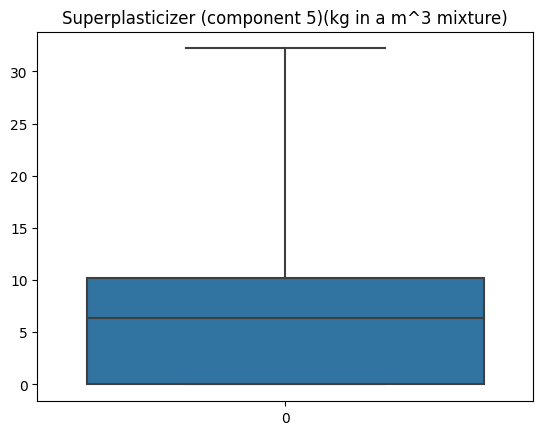

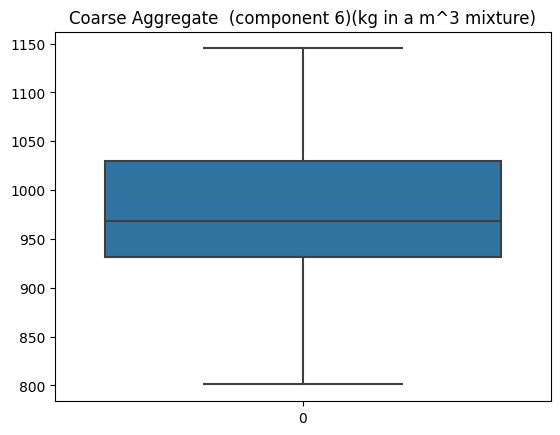

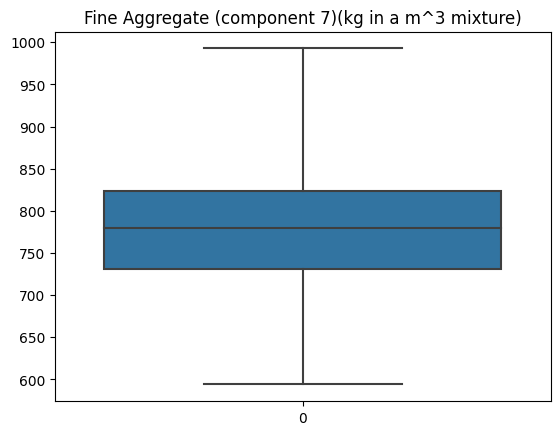

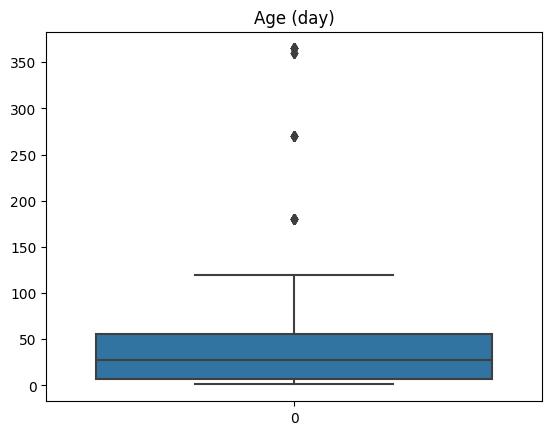

In [16]:
# Boxplot IQR Analizini otomatik yapar ve görselleştirir.

for col in df.columns[:-1]:
  sns.boxplot(df[col], whis = 2.5)
  plt.title(col)
  plt.show()

In [17]:
df['Age (day)']

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Age (day), Length: 1030, dtype: int64

In [19]:
# Manual IQR
Q1 = df['Age (day)'].quantile(0.25)

In [20]:
Q3 = df['Age (day)'].quantile(0.75)

In [21]:
IQR = Q3 - Q1

In [23]:
up_limit = Q3 + 1.5 * IQR
low_limit = Q1 + 1.5 * IQR

In [26]:
outlier = df[(df['Age (day)'] > up_limit) | (df['Age (day)'] < low_limit)]

In [27]:
outlier

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [29]:
# IQR Function

def iqr_analysis(df, col, iqr_rate):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)

  IQR = Q3 - Q1

  up_limit = Q3 + iqr_rate * IQR
  low_limit = Q1 + iqr_rate * IQR

  outlier = df[(df[col] > up_limit) | (df[col] < low_limit)]

  return outlier

In [30]:
iqr_analysis(df, 'Age (day)', 1.5)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


# Modelling

In [31]:
X = df.drop(target_col, axis = 1)
y = df[target_col]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 34)

Base XGB

In [34]:
from xgboost import XGBRegressor

In [35]:
base_xgb = XGBRegressor()

base_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [37]:
y_pred = base_xgb.predict(X_test)

In [39]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

In [40]:
mae(y_test, y_pred)

3.1310921830618628

In [41]:
mse(y_test, y_pred) # Çok anlamlı değil

24.38895431571585

In [45]:
rmse = mse(y_test, y_pred) ** 0.5 # RMSE, MAE benzeri bir metrik gibi düşünülebilir ancak büyük hataları daha büyük cezalandırır.
rmse #buradaki değer fena değil (mae ile yakınlığa bakıyoruz)

4.9385174208172895

In [42]:
r2(y_test, y_pred)

0.9047747726064387

In [66]:
def eval_metrics(y_test, y_pred):
  print(f"""MAE : {mae(y_test, y_pred)}
MSE : {mse(y_test, y_pred)}
RMSE : {mse(y_test, y_pred) ** 0.5}
R2 : {r2(y_test, y_pred)}""")

In [67]:
eval_metrics(y_test, y_pred)

MAE : 3.1310921830618628
MSE : 24.38895431571585
RMSE : 4.9385174208172895
R2 : 0.9047747726064387


# Tuned XGB

*Random Search*

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
vanilla_xgb = XGBRegressor()

param_dist = {"n_estimators": np.arange(100,2000,100),
              "max_depth": np.arange(2,12),
              "learning_rate": np.arange(0.01, 1, 0.05),
              "subsample": [0.5, 0.6,0.7, 0.8, 0.9, 1]
}

In [73]:
random_model = RandomizedSearchCV(vanilla_xgb, param_dist, n_iter = 30, cv = 5, scoring = 'neg_mean_squared_error')

random_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                   param_distributions={'learning_rate': array([0.01, 0.06, 0.11, 0.16, 0.21, 0.26, 0.31, 0.36, 0.41, 0.46, 0.51,
       0.56, 0.61, 0.66, 0.71, 0.76, 0.81, 0.86, 0.91, 0.96]),
                                        'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                                        'n_estimators': array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900]),
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   scoring='neg_mean_squared_error')

In [79]:
random_model.best_params_

{'subsample': 0.5, 'n_estimators': 400, 'max_depth': 11, 'learning_rate': 0.11}

In [80]:
tuned_xgb = random_model.best_estimator_

In [82]:
y_pred = tuned_xgb.predict(X_test)

In [83]:
eval_metrics(y_test, y_pred)

MAE : 2.8351308213768434
MSE : 19.165580929901704
RMSE : 4.377851177221732
R2 : 0.925169124573596


In [74]:
from lightgbm import LGBMRegressor

In [75]:
base_lgb = LGBMRegressor()

In [76]:
base_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1076
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 8
[LightGBM] [Info] Start training from score 35.609497
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMRegressor()

In [77]:
y_pred = base_lgb.predict(X_test)

In [78]:
eval_metrics(y_test, y_pred)

MAE : 3.2544207287383777
MSE : 25.153352654908065
RMSE : 5.015311820306696
R2 : 0.901790224571842


# Tuned LGB

*Grid Search*

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
vanilla_lgb = LGBMRegressor()

params = {'n_estimators': [100,300,600,1000],
          'max_depth': [3, 5, 7],
          'learning_rate': [0.01,0.07,0.1],
          'subsample': [0.5, 0.8, 1]
}

In [87]:
grid_model = GridSearchCV(vanilla_lgb, params, scoring = "neg_mean_squared_error", cv = 3)

grid_model.fit(X_train, y_train)

Görüntülenen çıkış son 5000 satıra kısaltıldı.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.01, 0.03, 0.07, 0.1],
                         'max_depth': [2, 3, 5, 7],
                         'n_estimators': [100, 300, 600, 1000],
                         'subsample': [0.5, 0.8, 1]},
             scoring='neg_mean_squared_error')

In [88]:
grid_model.best_estimator_

LGBMRegressor(max_depth=5, n_estimators=600, subsample=0.5)

In [89]:
grid_model.best_score_

-20.44977779535161

In [94]:
grid_model.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 600, 'subsample': 0.5}

In [90]:
tuned_lgb = grid_model.best_estimator_

In [91]:
y_pred = tuned_lgb.predict(X_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


In [92]:
eval_metrics(y_test, y_pred)

MAE : 2.954244621303243
MSE : 21.33774160248881
RMSE : 4.6192793380016335
R2 : 0.9166880519000877
